# Creating a single event-log

In [1]:
# Install requirements
#!pip install numpy pandas pm4py
#!brew install graphviz

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [3]:
eventlog_settings = {
                    # number of traces/cases in the event-log
                    "number_of_traces":1000,

                    # level of entropy: min, medium and/or max
                    "process_entropy": "med_entropy",#"min_entropy","med_entropy","max_entropy"

                    # first or higher-order markov chain to represent the transitions "memoryless", "memory"
                    "process_type":"memory",

                    # order of the HOMC - only specify this when using process with memory
                    "process_memory":2,

                    # number of activity types
                    "statespace_size":5,
                    
                    # number of transitions - only used for medium entropy (should be higher than 2 and < statespace size)
                    "med_ent_n_transitions":3,
                                    
                    # lambda parameter of inter-arrival times
                    "inter_arrival_time":1.5,
                    
                    # lambda parameter of process noise
                    "process_stability_scale":0.1,
                    
                    # probability of agent being available
                    "resource_availability_p":0.5,

                    # number of agents in the process
                    "resource_availability_n":3,

                    # waiting time in full days, when no agent is available. 0.041 is 15 minutes
                    "resource_availability_m":0.041,
                    
                    # variation between activity durations
                    "activity_duration_lambda_range":1,
                    
                    # business hours definition: when can cases be processed? ()
                    "Deterministic_offset_W":"weekdays",

                    # time-unit for a full week: days = 7, hrs = 24*7, etc.
                    "Deterministic_offset_u":7,

                    # offset for the timestamps used (years after 1970)
                    "datetime_offset":54,

                    # experiment identifier used when storing event-log
                    "idx":0,
                    }

In [4]:
from SynBPS.simulation.simulation_pipeline import generate_eventlog

In [7]:
log = generate_eventlog(eventlog_settings, output_dir="")

generated traces: 1000
traces: 1000
eventlog saved to: 0_Eventlog_med_entropy_memory.csv
events: 2820
ids: 1000


In [8]:
log

,caseid,activity,activity_no,y_acc_sum,z_t,n_t,q_t,h_t,b_t,s_t,v_t,u_t,starttime,endtime,arrival_datetime,start_datetime,end_datetime,start_day,start_hour
0,0,e,1,0,2.291819,2.291819,2.520054,0.082,0.146235,0.000000,0.865549,1.093784,2.520054,3.385603,2024-01-04 01:00:13,2024-01-04 06:28:52,2024-01-05 03:15:16,Thursday,6
1,0,c,2,0,2.291819,3.385603,3.563920,0.082,0.096318,0.000000,0.443426,0.621743,3.563920,4.007346,2024-01-04 01:00:13,2024-01-05 07:32:02,2024-01-05 18:10:34,Friday,7
2,0,d,3,0,2.291819,4.007346,4.226692,0.082,0.137346,0.273308,1.641867,2.134521,4.500000,6.141867,2024-01-04 01:00:13,2024-01-06 06:00:00,2024-01-07 21:24:17,Saturday,6
3,1,d,1,0,4.670494,4.670494,4.887931,0.041,0.176437,0.000000,0.126009,0.343446,4.887931,5.013940,2024-01-06 10:05:30,2024-01-06 15:18:37,2024-01-06 18:20:04,Saturday,15
4,1,c,2,0,4.670494,5.013940,5.121057,0.000,0.107117,2.378943,0.011893,2.497952,7.500000,7.511893,2024-01-06 10:05:30,2024-01-09 06:00:00,2024-01-09 06:17:07,Tuesday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,997,e,2,0,1530.881612,1531.647940,5.703956,0.000,0.056016,1.796044,0.588656,2.440716,1533.500000,1534.088656,2028-03-12 15:09:31,2028-03-15 06:00:00,2028-03-15 20:07:39,Wednesday,6
2816,998,d,1,0,1532.078305,1532.078305,6.210038,0.082,0.049734,1.289962,2.307366,3.729061,1533.500000,1535.807366,2028-03-13 19:52:45,2028-03-15 06:00:00,2028-03-17 13:22:36,Wednesday,6
2817,998,f,2,0,1532.078305,1535.807366,3.122904,0.082,0.233538,0.377096,0.615093,1.307727,1536.500000,1537.115093,2028-03-13 19:52:45,2028-03-18 06:00:00,2028-03-18 20:45:44,Saturday,6
2818,999,e,1,0,1532.253361,1532.253361,6.613241,0.082,0.277881,0.886759,0.675330,1.921970,1533.500000,1534.175330,2028-03-14 00:04:50,2028-03-15 06:00:00,2028-03-15 22:12:28,Wednesday,6


# BPMN model

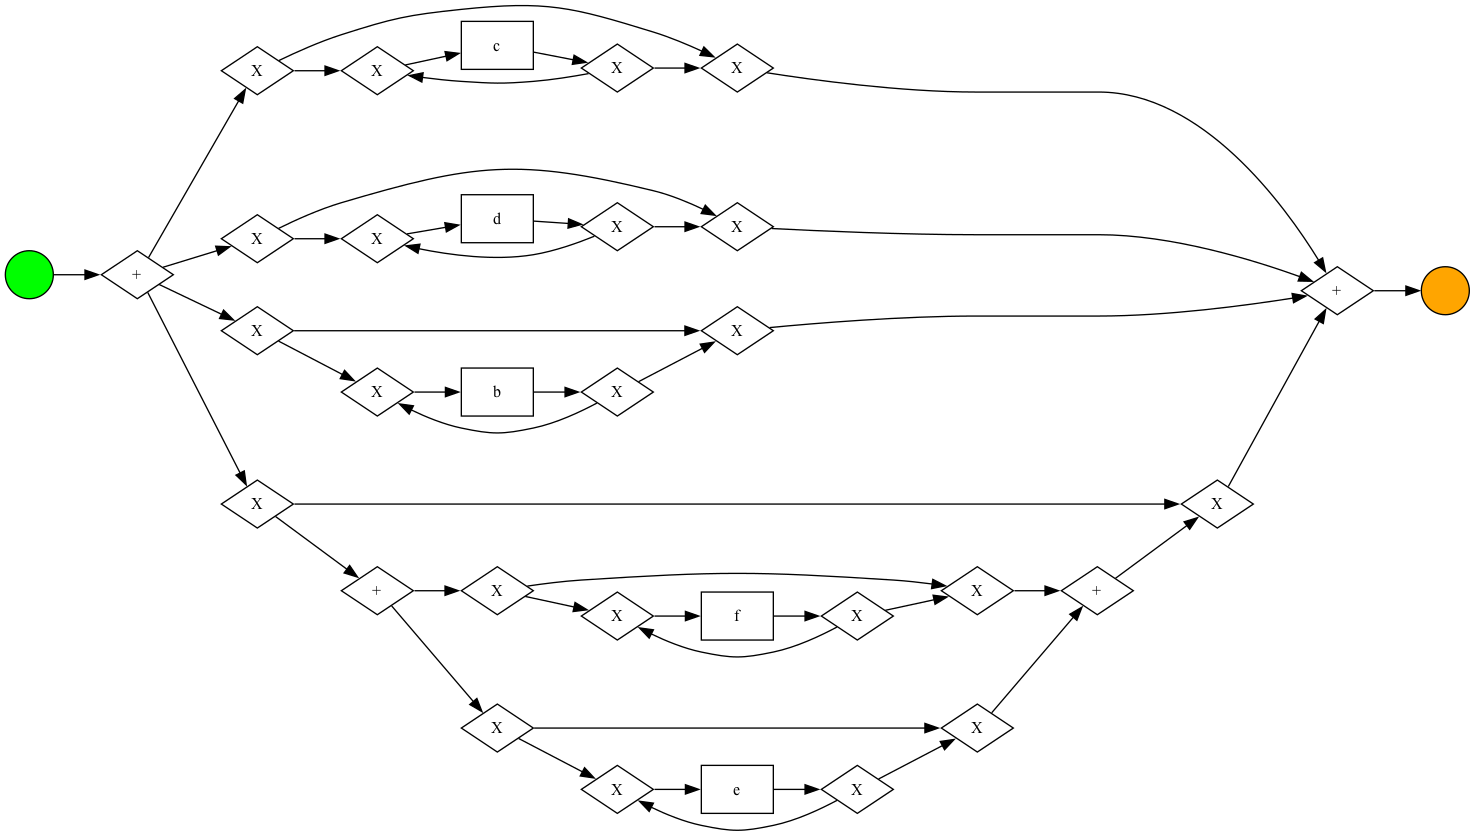

In [10]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer

# Ensure the required columns exist
required_columns = ['caseid', 'activity', 'start_datetime']
for col in required_columns:
    if col not in log.columns:
        raise ValueError(f"Column '{col}' not found in the DataFrame")

# Ensure datetime columns are in the correct format
log['start_datetime'] = pd.to_datetime(log['start_datetime'])
log['end_datetime'] = pd.to_datetime(log['end_datetime'])

# Sort the dataframe
log = log.sort_values('start_datetime')

# Convert DataFrame to event log format
dataframe = pm4py.format_dataframe(log, case_id='caseid', activity_key='activity', timestamp_key='start_datetime')
event_log = pm4py.convert_to_event_log(dataframe)

# Discover BPMN model
bpmn_model = pm4py.discover_bpmn_inductive(event_log)

# Visualize the BPMN model
bpmn_gviz = bpmn_visualizer.apply(bpmn_model)

filedest = "bpmn_diagram.png"

# Save the diagram as an image file (e.g., PNG)
bpmn_visualizer.save(bpmn_gviz, filedest)

# Display the image in the notebook
from IPython.display import display, Image
display(Image(filename=filedest))

# Variant analysis

Number of variants: 217
Total cases: 1000
Unique variants: 217
Variant coverage (top 5): 36.30%


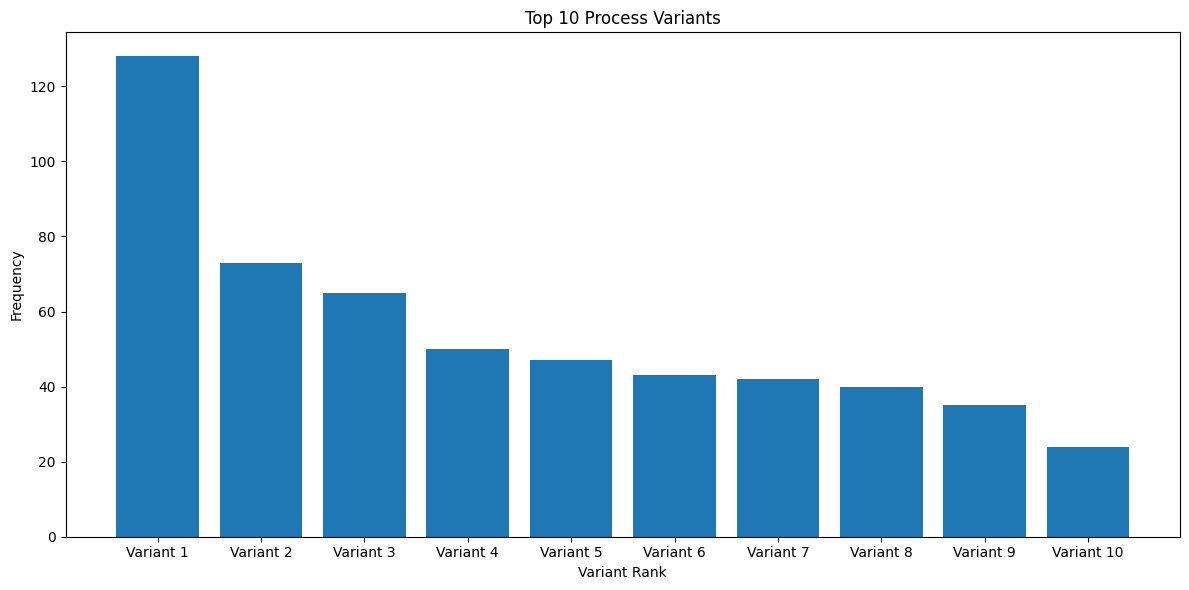


Top 5 most frequent variants:
1. Frequency: 128
   Activities: e -> e

2. Frequency: 73
   Activities: c

3. Frequency: 65
   Activities: c -> e

4. Frequency: 50
   Activities: d

5. Frequency: 47
   Activities: d -> e



In [11]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.algo.filtering.log.variants import variants_filter


# Get process variants
variants = variants_filter.get_variants(event_log)

# Print the number of variants
print(f"Number of variants: {len(variants)}")


import pm4py
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Function to extract activity sequence from a variant
def get_activity_sequence(variant):
    if isinstance(variant, tuple) and len(variant) == 1:
        # Single activity variant
        return variant
    elif isinstance(variant, tuple) and all(isinstance(item, tuple) for item in variant):
        # Multi-activity variant
        return tuple(activity for activity, _ in variant)
    else:
        # Unexpected format, return as is
        return variant

# Extract and count variants
variant_counts = Counter()
for variant, traces in variants.items():
    activity_sequence = get_activity_sequence(variant)
    variant_counts[activity_sequence] = len(traces)

# Convert to DataFrame for easier analysis
df_variants = pd.DataFrame(list(variant_counts.items()), columns=['Variant', 'Frequency'])
df_variants = df_variants.sort_values('Frequency', ascending=False).reset_index(drop=True)

# Calculate some statistics
total_cases = sum(df_variants['Frequency'])
unique_variants = len(df_variants)
top_5_coverage = df_variants['Frequency'].head(5).sum() / total_cases

# Print statistics
print(f"Total cases: {total_cases}")
print(f"Unique variants: {unique_variants}")
print(f"Variant coverage (top 5): {top_5_coverage:.2%}")

# Visualize top 10 variants
plt.figure(figsize=(12, 6))
plt.bar(range(10), df_variants['Frequency'].head(10))
plt.title('Top 10 Process Variants')
plt.xlabel('Variant Rank')
plt.ylabel('Frequency')
plt.xticks(range(10), [f"Variant {i+1}" for i in range(10)])
plt.tight_layout()
plt.show()

# Print details of top 5 variants
print("\nTop 5 most frequent variants:")
for i, (variant, freq) in enumerate(df_variants.head(5).itertuples(index=False), 1):
    print(f"{i}. Frequency: {freq}")
    print(f"   Activities: {' -> '.join(str(v) for v in variant)}")
    print()